In [1]:
import timeit
import math
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
# Part 1 and Part 2
# iterative function to return the factorial of n
def iterative(n):
    a = 1
    for i in range(int(n)):
        a *= i+1
    return a

# non-tail recursive function to return the factorial of n
def fact_nt(n):
    if (n == 0 or n == 1):
        return 1
    return n*fact_nt(n-1)

# tail recursive function to return the factorial of n
def fact_t(n, a):
    if(n == 0):
        return a;
    return fact_t(n-1, a*n);

# function to call the iterative function 1000 times and return the average runtime
avg = 1000
def iter_time(n):
    stmt = '''
def iterative(n):
    a = 1
    for i in range(int(n)):
        a *= i+1
    return a
    
iterative({0})
    '''.format(n)

    return (timeit.timeit(stmt, number = avg)/avg)

# function to call the non-tail recursive function 1000 times and return the average runtime
def fact_nt_time(n):
    stmt = '''
def fact_nt(n):
    if (n == 0 or n == 1):
        return 1
    return n*fact_nt(n-1)
    
fact_nt({0})
    '''.format(n)

    return timeit.timeit(stmt, number = avg)/avg

# function to call the tail recursive function 1000 times and return the average runtime
def fact_t_time(n):
    stmt = '''
def fact_t(n, a):
    if(n == 0):
        return a;
    return fact_t(n-1, a*n);
    
fact_t({0},1)
    '''.format(n)

    return timeit.timeit(stmt, number = avg)/avg

In [3]:
# create array of values for n, 50,100,150 ... 2000. 
n = 2000
step1 = 50
x = np.linspace(step1, n, n//step1)

In [4]:
# create list of iterative runtime values for each n, and convert to milliseconds
y1 = list(map(iter_time, x))
y1 = [i*1000 for i in y1]

In [5]:
# create list of non-tail recusive runtime values for each n, and convert to milliseconds
y2 = list(map(fact_nt_time, x))
y2 = [i*1000 for i in y2]

In [6]:
# create list of tail recusive runtime values for each n, and convert to milliseconds
y3 = list(map(fact_t_time, x))
y3 = [i*1000 for i in y3]

iterative line = 0.00068x + -0.17947
non-tail line  = 0.00038x + -0.00773
tail line      = 0.00035x + -0.02236


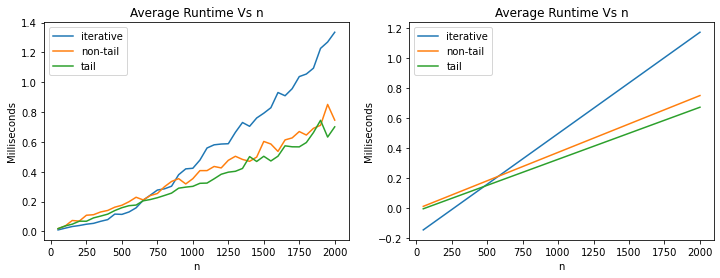

In [7]:
# Part 5.1
# define line function for curve_fit
def line(x, a, b):
    return x*a + b
# get line of best fit for each graph
line1 = curve_fit(line, x, y1)
line2 = curve_fit(line, x, y2)
line3 = curve_fit(line, x, y3)
# plot runtime vs n for each function
fig = plt.figure()
fig.set_figwidth(2 * fig.get_figwidth())
fig.set_figheight(1 * fig.get_figheight())
plt.subplot(121)
plt.plot(x, y1, label = 'iterative')
plt.plot(x, y2, label = 'non-tail')
plt.plot(x, y3, label = 'tail')
plt.title('Average Runtime Vs n')
plt.ylabel('Milliseconds')
plt.xlabel('n')
plt.legend()
# plot line of best fit for each function
plt.subplot(122)
plt.plot(x, line(x, *line1[0]), label = 'iterative')
plt.plot(x, line(x, *line2[0]), label = 'non-tail')
plt.plot(x, line(x, *line3[0]), label = 'tail')
plt.title('Average Runtime Vs n')
plt.ylabel('Milliseconds')
plt.xlabel('n')
plt.legend()
plt.savefig('runtime1.png')
print('iterative line = {:.5f}x + {:.5f}'.format(*line1[0]))
print('non-tail line  = {:.5f}x + {:.5f}'.format(*line2[0]))
print('tail line      = {:.5f}x + {:.5f}'.format(*line3[0]))

The signal is quite noisy, even when averaged over 1000 runs.
Iterative is slightly faster for small n, and then becomes much slower as n increases. <br>
Tail recursive is slightly faster than non-tail recursive. <br>
All 3 are linear, but the slope of the iterative graph seems to change at around n = 500. Also, the satistical errors from the measurements only cause the time to increase, as the measured time cannot be lower than the theoretical time. This means the slope of the lines of best fit are greater than the theoretical slope. This is why there are some negative values for low n, which is obviously not realistic, and the slope intercept values are negative when they should be positive.

In [8]:
# Part 3. 
# iterative linear search, returns the index of the value 'x' in the list 'arr'
def lin_search(arr, x):
    for i in range(len(arr)):
        if(arr[i] == x):
            return i
    print('Not in list.')

# recusive binary search, returns the index of the value 'x' in the list 'arr'
def binary_search(arr, x, l, r):
    if r >= l:
        mid = l + (r-l) // 2
        if arr[mid] == x:
            return mid
        elif(arr[mid] > x):
            return binary_search(arr, x, l, mid-1)
        else:
            return binary_search(arr, x, mid+1, r)
    else:
        print('Not in list.')
        
# Call linear_search 1000 times and return the average runtime
avg2 = 1000
def lin_time(arr, x):
    stmt = '''
def lin_search(arr, x):
    for i in range(len(arr)):
        if(arr[i] == x):
            return i
lin_search({0},{1})
    '''.format(arr, x)
    return (timeit.timeit(stmt, number = avg2)/avg2)

# Call binary_search 1000 times and return the average runtime
def bin_time(arr, x, l, r):
    stmt = '''
def binary_search(arr, x, l, r):
    if r >= l:
        mid = l + (r-l) // 2
        if arr[mid] == x:
            return mid
        elif(arr[mid] > x):
            return binary_search(arr, x, l, mid-1)
        else:
            return binary_search(arr, x, mid+1, r)
binary_search({0},{1},{2},{3})
    '''.format(arr, x, l, r)
    return (timeit.timeit(stmt, number = avg2)/avg2)

# Part 4
# Best and worst case search times in nanoseconds
lin_best = lin_time(list(y1), y1[0])*10**9
lin_worst = lin_time(list(y1), y1[len(y1)-1])*10**9
bin_best = bin_time(list(y1), y1[(len(y1))//2 -1], 0, len(y1)-1)*10**9
bin_worst = bin_time(list(y1), y1[-1], 0, len(y1)-1)*10**9   
print('''Linear best case = {:.2f} 
Linear worst case = {:.2f}
Binary best case = {:.2f} 
Binary worst case = {:.2f}'''.format(lin_best, lin_worst, bin_best, bin_worst))

Linear best case = 1428.00 
Linear worst case = 4152.10
Binary best case = 977.10 
Binary worst case = 4485.40


The best case for linear is when the value is at the first index. <br>
The worst case for linear is when the value is at the final index. <br>
The best case for binary is when the value is at the middle index. <br>
The worst case for binary can be at mulptiple indexes, I used the final index. <br>

In [9]:
# create n2/10 lists of size 50,100,150 ... 2000.
arrays = [[1]]
n2 = 2000
step2 = 50
for i in range(n2//step2):
    arrays.append(np.linspace(1,(i+1)*step2,(i+1)*step2))
    
# create list of linear worst case runtimes for each n
y4 = []
for i in range(n2//step2):
    y4.append(lin_time(list(arrays[i]), arrays[i][-1])*1000)

# create list of binary worst case runtimes for each n
y5 = []
for i in range(n2//step2):
    y5.append(bin_time(list(arrays[i]), arrays[i][-1], 0, len(arrays[i])-1)*1000)

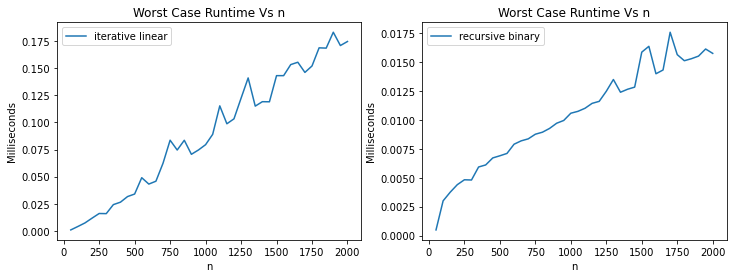

In [10]:
# plot worst case runtime vs list size for each search function
x2 = np.linspace(step2, n2, n2//step2)
fig = plt.figure()
fig.set_figwidth(2 * fig.get_figwidth())
fig.set_figheight(1 * fig.get_figheight())
plt.subplot(121)
plt.plot(x2, y4, label = 'iterative linear')
plt.title('Worst Case Runtime Vs n')
plt.ylabel('Milliseconds')
plt.xlabel('n')
plt.legend()
plt.subplot(122)
plt.plot(x2, y5, label = 'recursive binary')
plt.title('Worst Case Runtime Vs n')
plt.ylabel('Milliseconds')
plt.xlabel('n')
plt.legend()
plt.savefig('runtime2.png')

The signal is very noisy even with it averaged over 1000 runs, particularly for the binary one, as the runtime is so small, but the linear relationship of the iterative graph and the logarithmic relationship of the binary graph can clearly be seen. I didn't plot the best case runtimes, as they are O(1).

<ipython-input-11-81f2783432df>:4: RuntimeWarning: invalid value encountered in log2
  return a * np.log2(x * b) + c


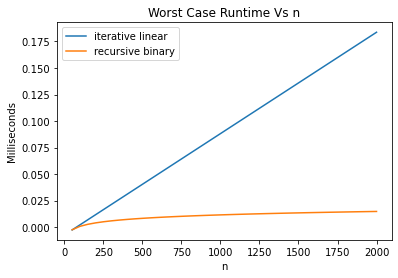

In [11]:
# Part 5.2
# define log function for curve_fit
def log(x, a, b, c):
    return a * np.log2(x * b) + c

# plot line of best fit for each function
line4 = curve_fit(line, x2, y4)
log1 = curve_fit(log, x2, y5)
plt.plot(x2, line(x2, *line4[0]), label = 'iterative linear')
plt.plot(x2, log(x2, *log1[0]), label = 'recursive binary')
plt.title('Worst Case Runtime Vs n')
plt.ylabel('Milliseconds')
plt.xlabel('n')
plt.legend()
plt.savefig('runtime3.png')

The binary one is clearly much faster, especially as n increases.